In [86]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

df_freq = fetch_openml(data_id=41214, as_frame=True).data

In [87]:
df_freq

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93
678009,6114327.0,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11
678010,6114328.0,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82
678011,6114329.0,0.0,0.00274,B,4.0,0.0,60.0,50.0,B12,Regular,95.0,R26


In [88]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   IDpol       678013 non-null  float64 
 1   ClaimNb     678013 non-null  float64 
 2   Exposure    678013 non-null  float64 
 3   Area        678013 non-null  category
 4   VehPower    678013 non-null  float64 
 5   VehAge      678013 non-null  float64 
 6   DrivAge     678013 non-null  float64 
 7   BonusMalus  678013 non-null  float64 
 8   VehBrand    678013 non-null  category
 9   VehGas      678013 non-null  object  
 10  Density     678013 non-null  float64 
 11  Region      678013 non-null  category
dtypes: category(3), float64(8), object(1)
memory usage: 48.5+ MB


In [89]:
df_freq.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


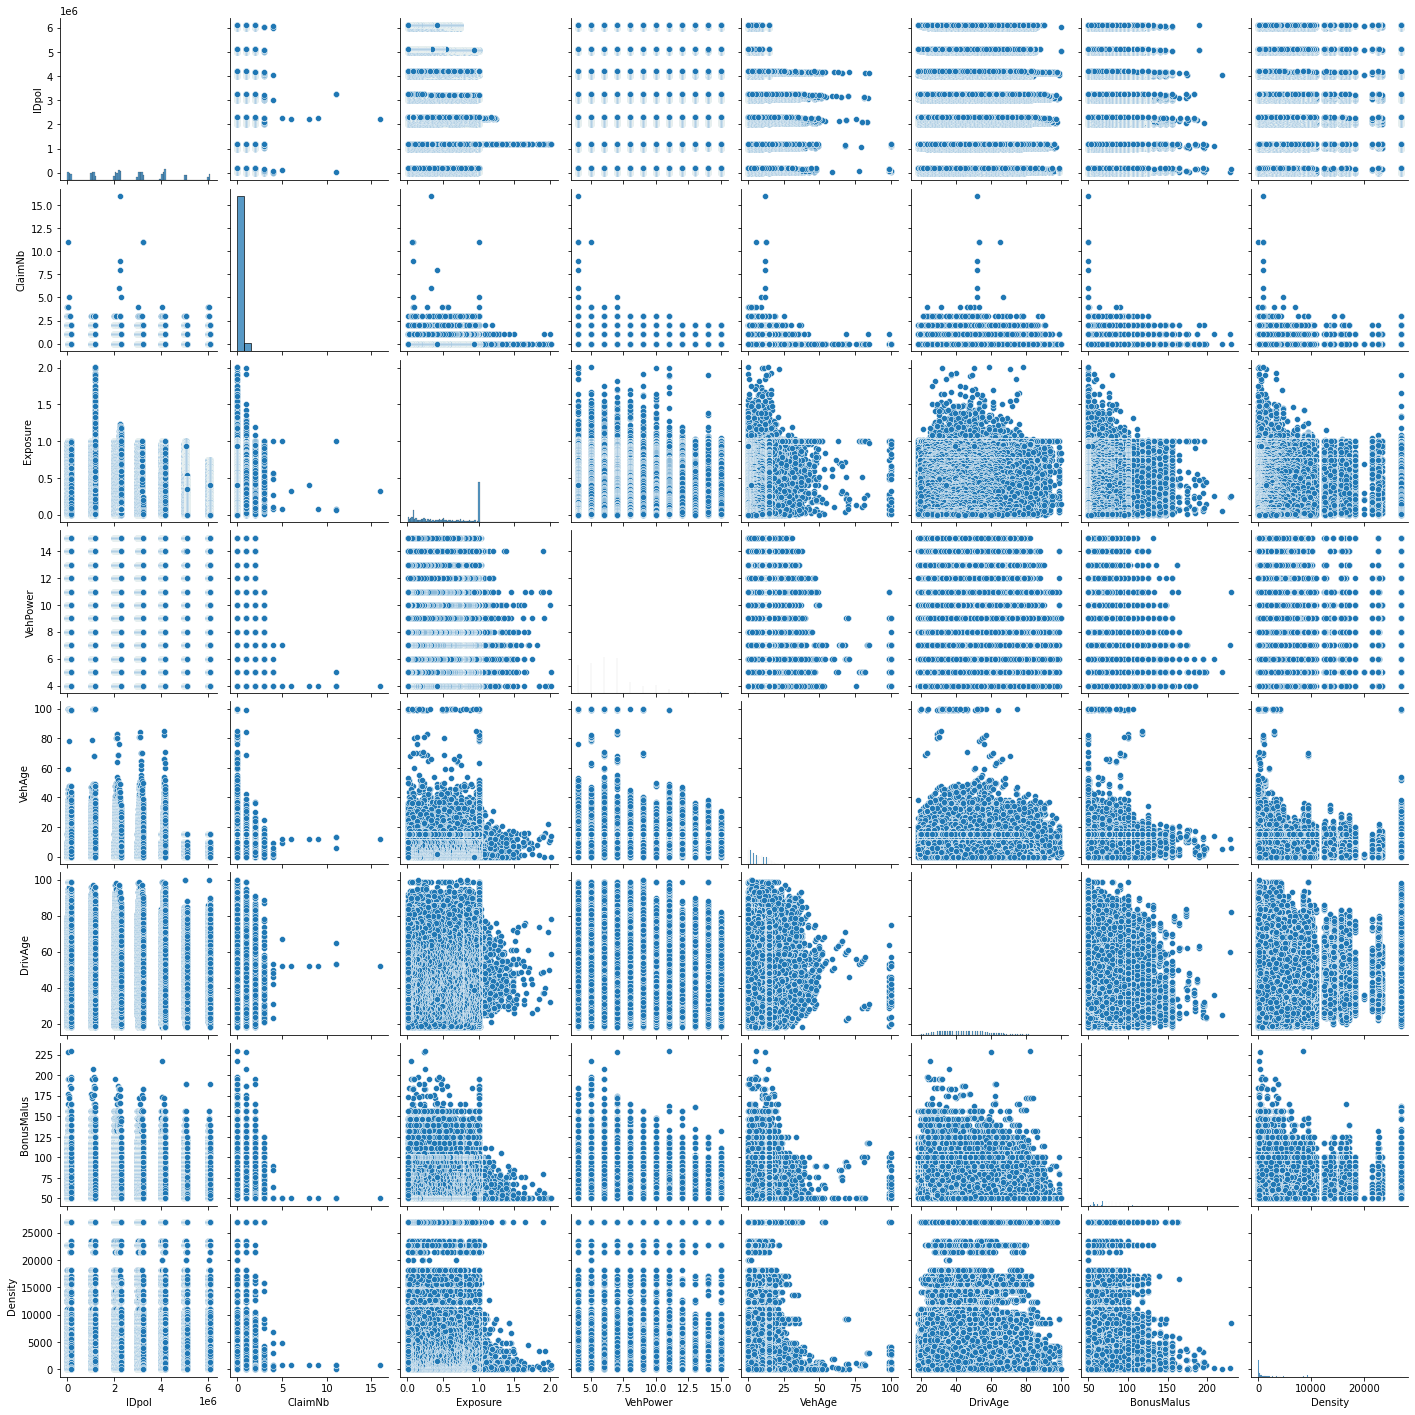

In [90]:
import seaborn as sns

sns.pairplot(df_freq)

In [91]:
df_freq['IDpol'] = df_freq['IDpol'].astype(int)
df_freq.set_index('IDpol', inplace=True)

In [92]:
df_sev = fetch_openml(data_id=41215, as_frame=True)["data"]
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [93]:
df_sev['IDpol'] = df_sev['IDpol'].astype(int)
df_sev = df_sev.groupby(by=["IDpol"]).sum()

In [94]:
df_sev

,ClaimAmount
IDpol,
139,303.00
190,1981.84
414,1456.55
424,10834.00
463,3986.67
...,...
6113521,1324.40
6113793,1769.88
6113817,1288.28


(array([2.0701e+04, 2.5320e+03, 6.9700e+02, 2.8000e+02, 1.9200e+02,
        1.2700e+02, 7.5000e+01, 4.6000e+01, 3.9000e+01, 2.5000e+01,
        2.0000e+01, 1.6000e+01, 1.6000e+01, 1.5000e+01, 8.0000e+00,
        1.1000e+01, 8.0000e+00, 1.3000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.000000e+00, 1.993450e+03, 3.985900e+03, 5.978350e+03,
        7.970800e+03, 9.963250e+03, 1.195570e+04, 1.394815e+04,
        1.594060e+04, 1.793305e+04, 1.992550e+04, 2.191795e+04,
        2.391040e+04, 2.590285e+04, 2.789530e+04, 2.988775e+04,
        3.188020e+04, 3.387265e+04, 3.586510e+04, 3.785755e+04,
        3.985000e+04]),
 <BarContainer object of 20 artists>)

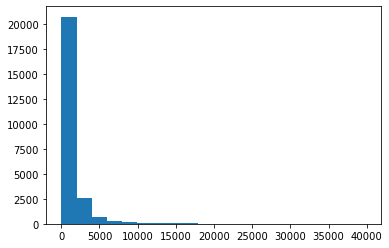

In [95]:
import matplotlib.pyplot as plt
plt.hist(df_sev[df_sev['ClaimAmount'] < 40000], bins = 20)


In [96]:
df = df_freq.join(df_sev, on="IDpol", how="left")

len(df)

678013

In [97]:
df['ClaimAmount'].fillna(0, inplace=True)

In [98]:
df['ClaimAmount'].isnull().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678013 entries, 1 to 6114330
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ClaimNb      678013 non-null  float64 
 1   Exposure     678013 non-null  float64 
 2   Area         678013 non-null  category
 3   VehPower     678013 non-null  float64 
 4   VehAge       678013 non-null  float64 
 5   DrivAge      678013 non-null  float64 
 6   BonusMalus   678013 non-null  float64 
 7   VehBrand     678013 non-null  category
 8   VehGas       678013 non-null  object  
 9   Density      678013 non-null  float64 
 10  Region       678013 non-null  category
 11  ClaimAmount  678013 non-null  float64 
dtypes: category(3), float64(8), object(1)
memory usage: 53.7+ MB


In [100]:
df['VehGas'] = df['VehGas'].astype(str)


In [101]:
df['Exposure']

IDpol
1          0.10000
3          0.77000
5          0.75000
10         0.09000
11         0.84000
            ...   
6114326    0.00274
6114327    0.00274
6114328    0.00274
6114329    0.00274
6114330    0.00274
Name: Exposure, Length: 678013, dtype: float64

In [102]:
# We set ClaimNb to 0 (if ClaimAmount was 0)
df.loc[(df['ClaimAmount'] == 0) & (df['ClaimNb'] > 1), "ClaimNb"] = 0

In [103]:
# Correct for unreasonable observations (that might be data error)
# and a few exceptionally large claim amounts
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)
df["ClaimAmount"] = df["ClaimAmount"].clip(upper=200000)

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, KBinsDiscretizer, OneHotEncoder

log_scale_transformer = make_pipeline(
    FunctionTransformer(func=np.log), StandardScaler()
)

column_trans = ColumnTransformer(
    [
        ("binned_numeric", KBinsDiscretizer(n_bins=10), ["VehAge", "DrivAge"]),
        (
            "onehot_categorical",
            OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"],
        ),
        ("passthrough_numeric", "passthrough", ["BonusMalus"]),
        ("log_scaled_numeric", log_scale_transformer, ["Density"]),
    ],
    remainder="drop",
)
X = column_trans.fit_transform(df)

In [105]:
df["PurePremium"] = df["ClaimAmount"] / df["Exposure"]

df["Frequency"] = df["ClaimNb"] / df["Exposure"]
df["AvgClaimAmount"] = df["ClaimAmount"] / np.fmax(df["ClaimNb"], 1)

In [106]:
from sklearn.model_selection import train_test_split

df_train, df_test, X_train, X_test = train_test_split(df, X, random_state=0)

In [110]:
# Fit frequency model (number of insurance claims)
from sklearn.linear_model import PoissonRegressor

glm_freq = PoissonRegressor(alpha=1e-3, max_iter=400)
glm_freq.fit(X_train, df_train["Frequency"], sample_weight=df_train["Exposure"])

In [117]:
from sklearn.metrics import mean_squared_error
y_hat_freq = glm_freq.predict(X_test)
mean_squared_error(df_test['Frequency'], y_hat_freq)

20.326988388781622

In [112]:
mask_train = df_train['ClaimAmount'] > 0
mask_test = df_test['ClaimAmount'] > 0

In [113]:
from sklearn.linear_model import GammaRegressor
glm_serv = GammaRegressor()
glm_serv.fit(X_train[mask_train], df_train.loc[mask_train, 'AvgClaimAmount'], sample_weight=df_train.loc[mask_train, 'ClaimNb'])

GammaRegressor()

In [135]:
y_hat_serv_test = glm_serv.predict(X_test[mask_test])
'{:.2e}'.format(mean_squared_error(df_test.loc[mask_test, 'AvgClaimAmount'], y_hat_serv_test))

'4.98e+07'

In [134]:
y_hat_serv_train = glm_serv.predict(X_train[mask_train])
'{:.2e}'.format(mean_squared_error(df_train.loc[mask_train, 'AvgClaimAmount'], y_hat_serv_train))

'5.85e+07'

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


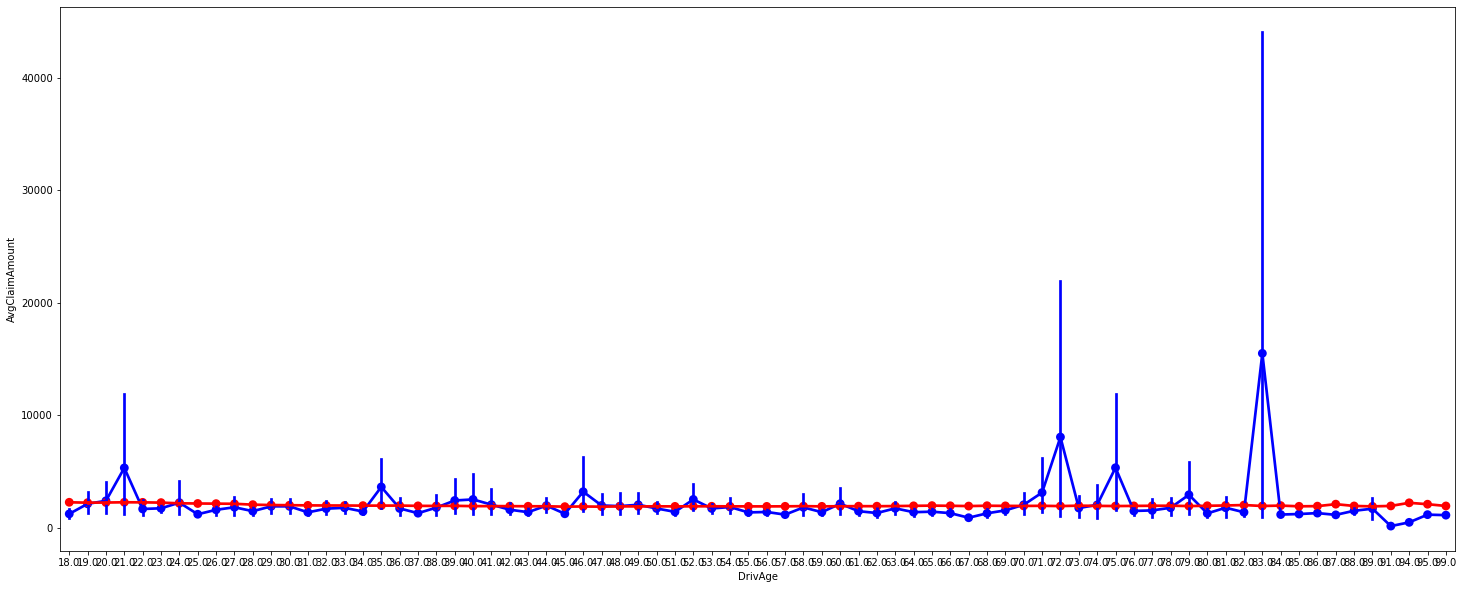

In [132]:
plt.figure(figsize=(25,10))
sns.pointplot(df_test.loc[mask_test,'DrivAge'], df_test.loc[mask_test, 'AvgClaimAmount'], color='blue')
sns.pointplot(df_test.loc[mask_test,'DrivAge'], y_hat_serv_test, color='red')
plt.show()